In [1]:
#For data processing
import pandas as pd
import numpy as np

#For analysis and visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
#Loading the data
df = pd.read_excel(r"C:\Users\ASHOK\Downloads\startup_funding.xlsx")

In [3]:
#Gathering information about the data
df.describe()

,Sr No
count,3044.000000
mean,1522.500000
std,878.871435
min,1.000000
25%,761.750000
50%,1522.500000
75%,2283.250000
max,3044.000000


In [4]:
df.shape

(3044, 10)

In [5]:
#Checking for null value
null_check = df.isnull().sum().reset_index()
null_check.columns=['Columns','Number of Nulls']
null_check['% Of Nulls']=((null_check['Number of Nulls']/len(df))*100).round(2)
null_check

,Columns,Number of Nulls,% Of Nulls
0,Sr No,0,0.00
1,Date dd/mm/yyyy,0,0.00
2,Startup Name,0,0.00
3,Industry Vertical,171,5.62
4,SubVertical,936,30.75
5,City Location,180,5.91
6,Investors Name,24,0.79
7,InvestmentnType,4,0.13
8,Amount in USD,971,31.90
9,Remarks,2625,86.24


In [6]:
#Dropoing remarks column due to high null values as well as negligible significance
df.drop(['Sr No','Remarks'],axis=1,inplace=True)

In [7]:
#Removing 0 from categorical variables
df['Startup Name']=df['Startup Name'].str.replace('0','')
df['Industry Vertical']=df['Industry Vertical'].str.replace('0','')
df['City  Location']=df['City  Location'].str.replace('0','')
df['Investors Name']=df['Investors Name'].str.replace('0','')

In [8]:
#Replacing the nan in numerical variables with mode and means
df['SubVertical'].fillna(df['SubVertical'].mode()[0],inplace=True)
df['Industry Vertical'].fillna(df['Industry Vertical'].mode()[0],inplace=True)

In [9]:
df["Amount in USD"]=df["Amount in USD"].str.replace(",","")
df["Amount in USD"]=df["Amount in USD"].str.replace("undisclosed","")
df["Amount in USD"]=df["Amount in USD"].str.replace("Undisclosed","")
df["Amount in USD"]=df["Amount in USD"].str.replace("0N/A","")
df["Amount in USD"]=df["Amount in USD"].str.replace("unknown","")
df["Amount in USD"]=df["Amount in USD"].str.replace("+","")

In [10]:
#Changing type of amount column to numerical for calculations and filling nan values with mean
df["Amount in USD"]=pd.to_numeric(df["Amount in USD"])
df['Amount in USD'].fillna(df['Amount in USD'].mean(),inplace=True)

In [11]:
#Wrangling the datetime column for inaccuracies
df["Date dd/mm/yyyy"]=df["Date dd/mm/yyyy"].replace("05/072018", "05/07/2018", regex = True)
df["Date dd/mm/yyyy"]=df["Date dd/mm/yyyy"].replace("01/07/015","01/07/2015")
df["Date dd/mm/yyyy"]=df["Date dd/mm/yyyy"].replace("010/7/2015","01/07/2015")
df["Date dd/mm/yyyy"]=df["Date dd/mm/yyyy"].replace("12/05.2015","12/05/2015")
df["Date dd/mm/yyyy"]=df["Date dd/mm/yyyy"].replace("13/04.2015","13/04/2015")
df["Date dd/mm/yyyy"]=df["Date dd/mm/yyyy"].replace("15/01.2015","15/01/2015")
df["Date dd/mm/yyyy"]=df["Date dd/mm/yyyy"].replace("22/01//2015","22/01/2015")

In [12]:
#Changing the type of the datetime column to datetime 
df['Date dd/mm/yyyy'] = pd.to_datetime(df['Date dd/mm/yyyy'])

In [13]:
 # To analyse trends over the years, creating the year and month column
df['Year'] = df['Date dd/mm/yyyy'].dt.year
df['Month'] = df['Date dd/mm/yyyy'].dt.month

[Text(0.5, 1.0, 'Distribution of null values in the data')]

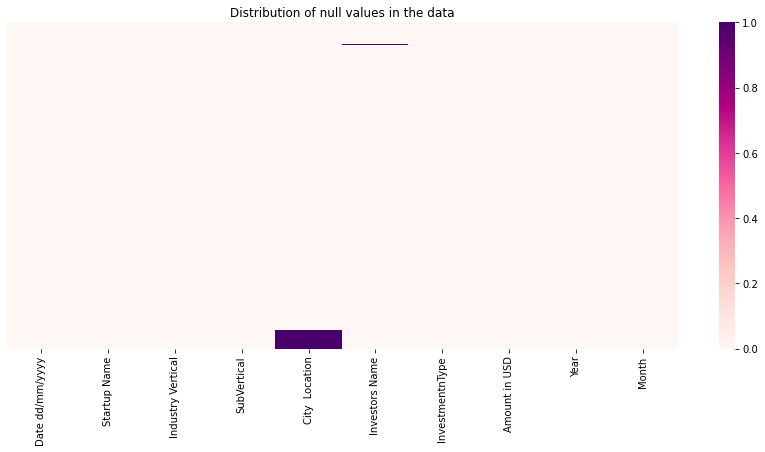

In [14]:
#Checking for null values
plt.figure(figsize=(15,6))
g1=sns.heatmap(data=df.isnull(),yticklabels=False,cmap='RdPu')
g1.set(title="Distribution of null values in the data")

In [15]:
df.head()

,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Year,Month
0,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,2020,1
1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,2020,1
2,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0,2020,1
3,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,2020,1
4,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,2020,1


In [16]:
# Top tem investors in Indian startup ecospheres
Top_investors=pd.DataFrame(df.groupby(['Investors Name']).sum()["Amount in USD"]).sort_values(by="Amount in USD",ascending=False)
Top_investors.head(10)

,Amount in USD
Investors Name,
Westbridge Capital,3.900000e+09
Softbank,2.500000e+09
SoftBank Group,1.462000e+09
"Microsoft, eBay, Tencent Holdings",1.400000e+09
Vijay Shekhar Sharma,1.038215e+09
Steadview Capital and existing investors,7.000000e+08
"Alibaba Group, Ant Financial",6.800000e+08
"Altimeter Capital, DST Global",5.850000e+08
SoftBank Vision Fund,5.310000e+08


[Text(0.5, 1.0, 'Top 10 Ivestors by amount Invested')]

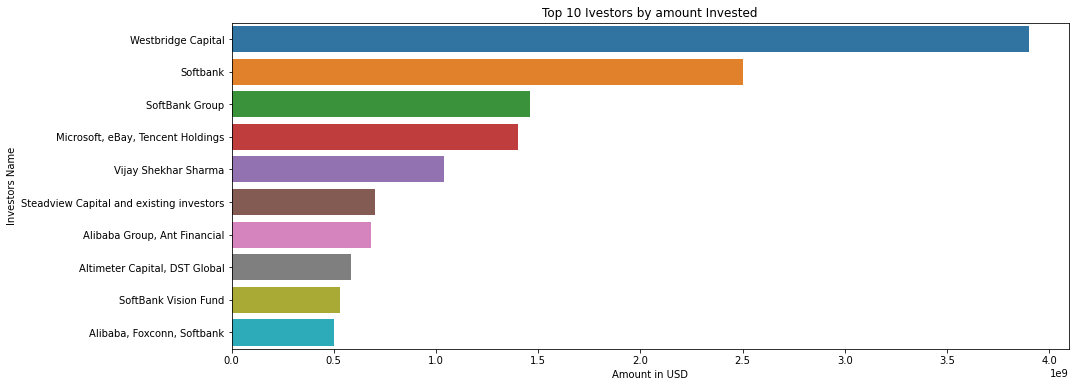

In [17]:
plt.figure(figsize=(15,6))
g2 = sns.barplot(data=(Top_investors[0:10]).reset_index(),x="Amount in USD",y='Investors Name')
g2.set(title="Top 10 Ivestors by amount Invested")

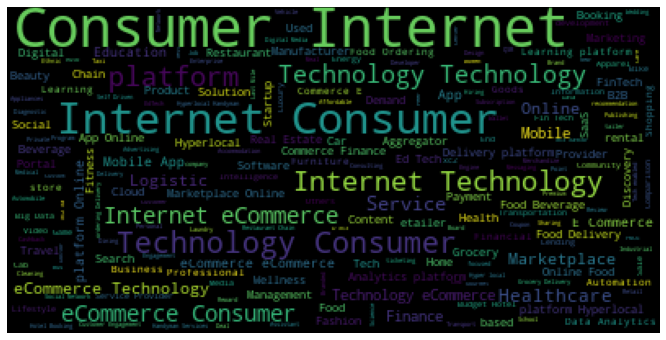

In [18]:
plt.figure(figsize=(15,6))
df['Industry Vertical'] = df['Industry Vertical'].astype(str)
text = ' '.join(df['Industry Vertical'])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<ipython-input-22-2025478eaf66>:7: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  g3=plt.pie(Top_10['% Investements'],labels=Top_10['City  Location'],autopct='%0.0f%%',


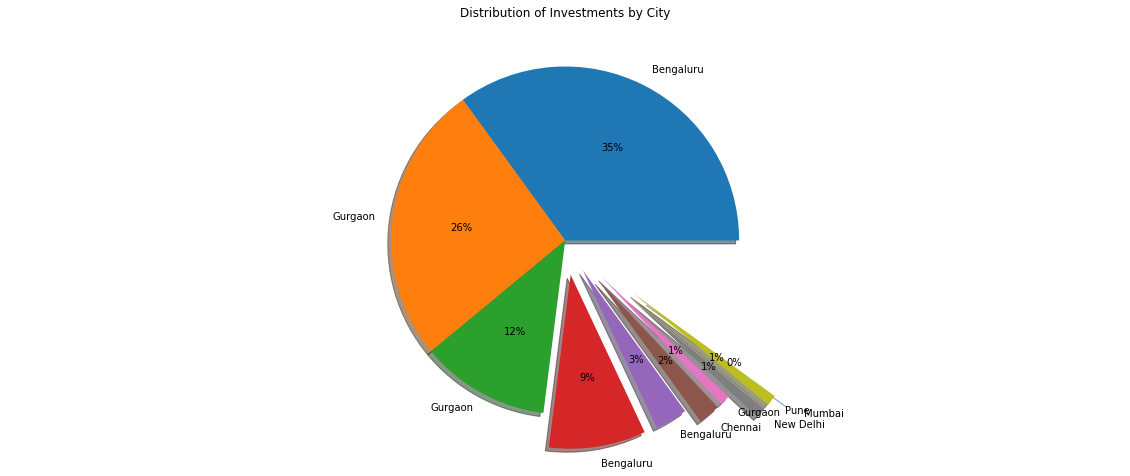

In [22]:
plt.figure(figsize=(20, 8))
plt.axis("equal")
plt.title("Distribution of Investments by City")
df['% Investements']=((df['Amount in USD']/df['Amount in USD'].sum())*100).round(2)
Top_10 = df[['City  Location','% Investements']][0:10]
Top_10=Top_10.sort_values(by='% Investements',ascending=False)
g3=plt.pie(Top_10['% Investements'],labels=Top_10['City  Location'],autopct='%0.0f%%',
           shadow=True, explode=[ 0, 0, 0, 0.2, 0.2,0.3,0.3,0.5,0.5,0.6])
plt.show()